## Imports and dataframes

In [2]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, KFold

In [3]:
# Original (cleaned) dataframe

full = pd.read_csv('C:/Users/Guest1/Desktop/Uni/Springboard/Puppers/Data/cleaned_cbarq.csv')

This dataframe is the full data, post-cleaning. It is what was imported to begin the EDA notebook and includes all categories and breeds, converted to a 1-5 scale.

In [5]:
continuous = full.select_dtypes(include=[float, int])
cont = continuous.columns
for col in cont:
    full[col] = full[col] + 1
full.drop(columns = 'Unnamed: 0')

,BreedID,sex,fixed,color,strangeraggr,owneraggr,dogaggr,dogfear,dogrivalry,trainability,chasing,strangerfear,nonsocialfear,sepprobs,touchsens,excitability,attachatten,energy
0,Mixed Breed/Unknown,F,True,black,1.0,1.000,1.00,1.0,1.000000,4.125000,3.25,2.00,2.000000,1.000,1.50,1.666667,1.666667,3.0
1,American Staffordshire Terrier,M,False,yellow,1.0,1.000,1.00,1.0,1.000000,2.625000,1.00,1.00,1.000000,1.750,1.00,4.333333,2.500000,2.0
2,Bernese Mountain Dog,M,True,tan,1.2,1.000,1.25,1.0,1.250000,3.125000,1.50,1.00,1.166667,1.375,1.00,3.000000,4.166667,5.0
3,Sussex Spaniel,M,False,fawn,1.1,1.000,1.00,2.0,1.750000,3.625000,3.75,1.00,1.000000,2.500,1.75,4.333333,4.000000,4.5
4,Mixed Breed/Unknown,M,False,fawn,1.3,1.000,1.50,1.0,1.000000,3.750000,3.00,3.00,3.000000,1.000,1.25,2.833333,3.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11947,Bouvier des Flandres,M,False,brindle,1.7,1.125,2.75,2.0,1.560534,3.000000,4.75,1.00,2.000000,1.750,1.25,2.166667,3.200000,3.0
11948,Bichon Frise,F,False,red,2.1,1.125,2.25,2.0,1.560534,3.500000,1.75,2.75,2.500000,2.000,1.25,3.833333,2.500000,4.0
11949,Golden Retriever,F,True,tan,1.0,1.000,1.00,1.0,1.000000,2.833333,1.00,1.00,1.600000,1.625,1.00,4.166667,3.666667,5.0
11950,Golden Retriever,M,False,fawn,1.0,1.000,1.00,1.0,1.000000,4.285714,1.00,1.00,1.166667,1.000,1.00,2.500000,3.333333,1.0


In [6]:
df = full.drop(columns = ['sex', 'fixed', 'color', 'Unnamed: 0'])

This is the full dataset minus the artificial sex, fixed, and color columns.

In [8]:
# Narrowed to top 10 breeds

counts = df['BreedID'].value_counts()
top10 = df[~df['BreedID'].isin(counts[counts < 220].index)]

# Fix unnecessary columns

top10 = top10.reset_index()
top10 = top10.drop(['index'], axis=1)
top10.head()

,BreedID,strangeraggr,owneraggr,dogaggr,dogfear,dogrivalry,trainability,chasing,strangerfear,nonsocialfear,sepprobs,touchsens,excitability,attachatten,energy
0,Mixed Breed/Unknown,1.000000,1.000,1.00,1.00,1.0,4.125000,3.25,2.0,2.000000,1.000,1.500000,1.666667,1.666667,3.0
1,Mixed Breed/Unknown,1.300000,1.000,1.50,1.00,1.0,3.750000,3.00,3.0,3.000000,1.000,1.250000,2.833333,3.000000,2.0
2,Labrador Retriever,1.400000,1.000,1.25,1.25,1.0,4.285714,4.25,1.0,1.833333,1.000,1.250000,3.833333,3.666667,3.0
3,Mixed Breed/Unknown,3.100000,1.375,3.00,3.00,3.0,3.250000,2.75,3.0,3.000000,2.875,2.500000,3.333333,2.833333,2.5
4,Border Collie,1.111111,1.000,1.50,1.25,1.0,4.500000,2.75,1.0,1.200000,1.000,1.333333,3.000000,2.166667,2.5


This dataframe includes all categories, but only the top 10 breeds: Mixed Breed/Unknown, Labrador Retriever, German Shepherd, Golden Retriever, Rottweiler, Border Collie, Australian Shepherd, Soft-Coated Wheaten Terrier, Doberman Pinscher, and Poodle. It has been adjusted to a 1-5 scale.

In [10]:
# Post-EDA (narrowed) dataframe

final = pd.read_csv('C:/Users/Guest1/Desktop/Uni/Springboard/Puppers/Data/cbarq_eda.csv')

This dataframe includes only the top 10 breeds (see above) and the top 5 columns (chasing, trainability, excitability, attachatten, energy). It is on a 1-5 scale, similar to the original survey that would have been given.

**Dataframes:**  
all 1-5 scale

**full:** all columns, all breeds (the only one with sex, fixed, and color)  
**df:** minus sex, fixed, and color (only quantitative columns and BreedID)  
**top10:** top 10 breeds  
**final:** top 10 breeds, top 5 columns  

### Negative vs Positive/Neutral Trait Distributions

In [14]:
# Create new columns averaging the values of all negative traits and all other traits for comparison.
# Using all breeds and categories (minus the artificials)

df['neg_traits'] = (df['strangeraggr'] + df['owneraggr'] + df['dogaggr'] + df['dogfear'] + df['dogrivalry'] + 
                  df['strangerfear'] + df['nonsocialfear'] + df['sepprobs'] + df['touchsens'])/9
df['oth_traits'] = (df['trainability'] + df['chasing'] + df['excitability'] + df['attachatten'] + df['energy'])/5

df[['neg_traits', 'oth_traits']]

,neg_traits,oth_traits
0,1.277778,2.741667
1,1.083333,2.491667
2,1.137963,3.358333
3,1.455556,4.041667
4,1.561111,2.916667
...,...,...
11947,1.681726,3.223333
11948,1.948393,3.116667
11949,1.136111,3.333333
11950,1.018519,2.423810


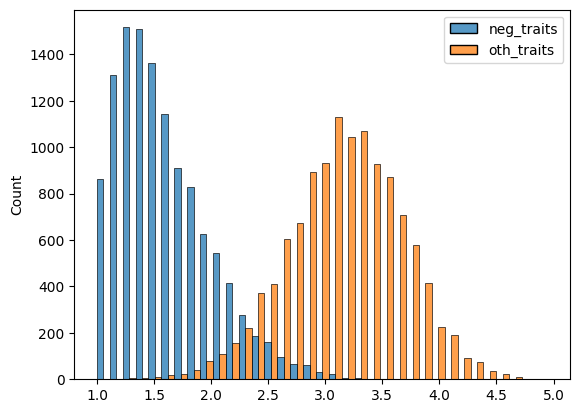

<Figure size 640x480 with 0 Axes>

In [15]:
# One histplot

sns.histplot(df[['neg_traits', 'oth_traits']], multiple = 'dodge')
plt.show()

# save fig
plt.savefig('Figures/trait_distributions')

In [16]:
# Boxplot

# Melt dataframe to combine traits into one column
melted = df.drop(columns = ['neg_traits', 'oth_traits']).melt(id_vars = 'BreedID', 
                                                                          var_name = 'trait', value_name = 'val')

# Create a 'key' dataframe associating each trait variable to a quality ('neg' or 'oth')

types = {'trait': ['strangeraggr', 'owneraggr', 'dogaggr', 'dogfear', 'dogrivalry', 
                   'strangerfear', 'nonsocialfear', 'sepprobs', 'touchsens', 'trainability', 
                   'chasing', 'excitability', 'attachatten', 'energy'],
         'type': ['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 
                  'oth', 'oth', 'oth', 'oth', 'oth']}
types_df = pd.DataFrame(types)

# Add a column assigning 'neg' to negative traits and 'oth' to other traits

new_col = []
for index, row in melted.iterrows():
    new_col.append(types_df.loc[types_df['trait'] == row['trait'], 'type'].values[0])
melted['trait_type'] = new_col
melted.sort_values(by = 'trait_type', inplace = True)
melted.sample(10)

,BreedID,trait,val,trait_type
104245,Cavalier King Charles Spaniel,nonsocialfear,2.00,neg
23016,American Pit Bull Terrier,owneraggr,1.00,neg
49524,Belgian Malinois,dogrivalry,1.50,neg
20704,Mixed Breed/Unknown,owneraggr,1.00,neg
57237,Afghan Hound,dogrivalry,3.25,neg
8078,American Eskimo Dog,strangeraggr,1.20,neg
84065,Cocker Spaniel (English),strangerfear,1.25,neg
114394,German Shepherd,sepprobs,1.00,neg
75064,Nova Scotia Duck Tolling Retriever,chasing,2.75,oth
34476,Mixed Breed/Unknown,dogaggr,1.50,neg


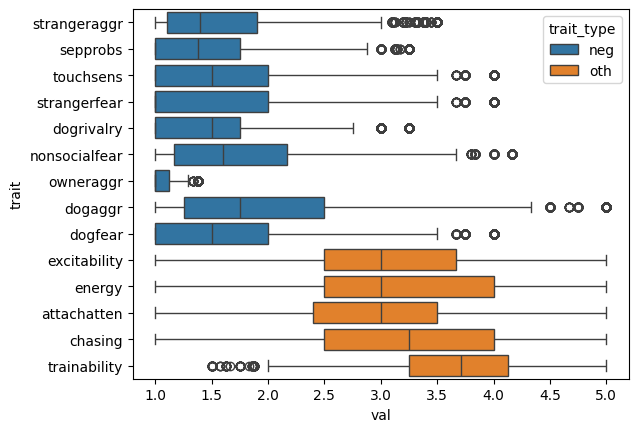

In [17]:
# Boxplot

sns.boxplot(data = melted, y = 'trait', x = 'val', hue = 'trait_type')
plt.show()

This plot looks a lot more cluttered and complicated to read; I prefer the histogram for my purposes.

### Standard Deviation Per Trait

In [20]:
df_less = df.drop(columns = ['BreedID', 'neg_traits', 'oth_traits'])
stds = df_less.std().reset_index()
stds

,index,0
0,strangeraggr,0.644786
1,owneraggr,0.134453
2,dogaggr,0.956437
3,dogfear,0.802528
4,dogrivalry,0.608744
5,trainability,0.620321
6,chasing,1.068542
7,strangerfear,0.848549
8,nonsocialfear,0.719829
9,sepprobs,0.575195


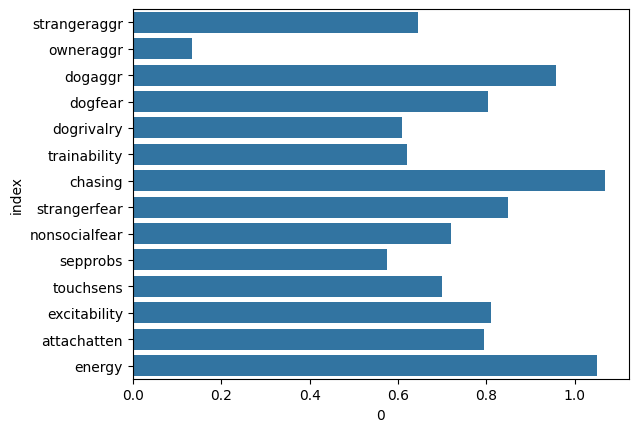

In [21]:
sns.barplot(data = stds, y = 'index', x = 0)
plt.show()

I don't like this graph either. Though it is interesting, it doesn't show my points very obviously.

### Comparative Model Performance

We know each model's score already. So, we will just copy those from the modeling notebook (to avoid extended notebook working times here). Models were fitted to the final dataset, which included the top 10 dog breeds and 5 categories: chasing, energy, excitability, attachatten, and trainability.

Linear Regression:  
Best score: -0.7485746361602028  
Mean cross validation train score: -0.7487784434024454  
Mean cross validation test score: -0.7434846910898371  
  
Lasso Regression:  
Best score: -0.7536399105522057  
Mean cross validation train score: -0.7536399105522057  
Mean cross validation test score: -0.7437437855836351  
  
XGBoost:  
Best score: -0.7483085775567475  
Mean cross validation train score: -0.748340765139614  
Mean cross validation test score: -0.7421402724677197  
  
Random Forest Regressor:  
Best score: -0.7486101776513545  
Mean cross validation train score: -0.7489359342164155  
Mean cross validation test score: -0.742842642871938  

In [26]:
# Set our variables

best_lin = -0.7485746361602028
cv_train_lin = -0.7487784434024454
cv_test_lin = -0.7434846910898371

best_lasso = -0.7536399105522057
cv_train_lasso = -0.7536399105522057
cv_test_lasso = -0.7437437855836351

best_xgb = -0.7483085775567475
cv_train_xgb = -0.748340765139614
cv_test_xgb = -0.7437437855836351

best_rfr = -0.7486101776513545
cv_train_rfr = -0.7489359342164155
cv_test_rfr = -0.742842642871938

In [27]:
# Make some lists to plot

names = ['Linear Regression','Lasso','XGBoost','Random Forest']
trains = [cv_train_lin,cv_train_lasso,cv_train_xgb,cv_train_rfr]
tests = [cv_test_lin,cv_test_lasso,cv_test_xgb,cv_test_rfr]
best_mses = [best_lin, best_lasso, best_xgb, best_rfr]

df = pd.DataFrame(list(zip(names, trains, tests, best_mses)), 
               columns =['Algorithm', 'NMSE Training Score', 'NMSE Testing Score', 'NMSE Best Score'])

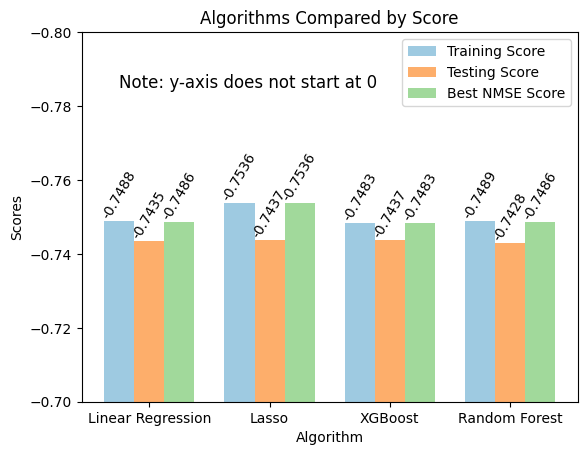

<Figure size 640x480 with 0 Axes>

In [28]:
# Finally, the plot

ind = np.arange(4)  
width = 0.25
cmap = plt.get_cmap('tab20c')
c1 = cmap(2/20)
c2 = cmap(6/20)
c3 = cmap(10/20)
    
xvals = trains
bar1 = plt.bar(ind, xvals, width, color=c1) 
  
yvals = tests
bar2 = plt.bar(ind+width, yvals, width, color=c2) 
  
zvals = best_mses 
bar3 = plt.bar(ind+width*2, zvals, width, color=c3) 
  
plt.xlabel("Algorithm") 
plt.ylabel('Scores') 
plt.title("Algorithms Compared by Score") 
 
plt.xticks(ind+width,names) 
plt.legend((bar1, bar2, bar3), ('Training Score', 'Testing Score', 'Best NMSE Score')) 

for bar in bar1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom', rotation=60)

for bar in bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom', rotation=60)

for bar in bar3:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom', rotation=60)

plt.ylim(-0.7, -0.8)

plt.annotate('Note: y-axis does not start at 0', xy = (0, -0.785), xycoords = 'data', 
             xytext = (0, -0.785), textcoords = 'data', fontsize = 12)
    
plt.show()

# Save figure

plt.savefig('Figures/models_performance')

### Final Model Evaluation